# Código final

In [37]:
# Importación de Librerías
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [38]:
# Configuración para visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Comprensión de los Datos

In [39]:
# Cargar datos
df = pd.read_csv('USvideos_cc50_202101.csv')
category_df = pd.read_json('US_category_id.json')

In [40]:
# Mapear IDs de categoría con nombres
# Convertir el JSON de categorías a un DataFrame
categories = {item['id']: item['snippet']['title'] for item in category_df['items']}
categories_df = pd.DataFrame(list(categories.items()), columns=['category_id', 'category_name'])

In [41]:
# Vista preliminar de los datos
print("Primeras filas del dataset:\n")
df.head()


Primeras filas del dataset:



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)


In [42]:
print("\nInformación del dataset:\n")
df.info()


Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  int64  
 8   likes                   40949 non-null  int64  
 9   dislikes                40949 non-null  int64  
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error

In [43]:
print("\nEstadísticas descriptivas:\n")
df.describe()


Estadísticas descriptivas:



,category_id,views,likes,dislikes,comment_count,lat,lon
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,39.660944,-93.741838
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,6.589701,19.034596
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,19.741755,-155.844437
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,35.860119,-105.358887
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,39.833851,-90.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,44.000000,-80.500000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,66.160507,-68.972168


In [44]:
df.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'state', 'lat', 'lon', 'geometry'], dtype=object)

In [45]:
print(df['state'].value_counts())

state
North Carolina      888
Nevada              874
Georgia             864
Delaware            857
Mississippi         856
New Hampshire       855
Maryland            854
Alabama             849
Texas               843
Arizona             840
Louisiana           837
Minnesota           834
Iowa                832
Ohio                831
Virginia            830
Vermont             830
Arkansas            830
Michigan            829
Indiana             828
Alaska              826
Montana             822
Kansas              820
Oregon              819
Oklahoma            818
Nebraska            816
Utah                816
South Dakota        816
New Jersey          814
Colorado            812
Maine               810
Rhode Island        809
Hawaii              807
Massachusetts       806
Idaho               806
California          804
Washington State    802
Missouri            800
Wisconsin           798
West Virginia       798
Wyoming             798
North Dakota        798
Florida   

In [46]:
# Frecuencia por categoría
print(df['category_id'].value_counts())

category_id
24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: count, dtype: int64


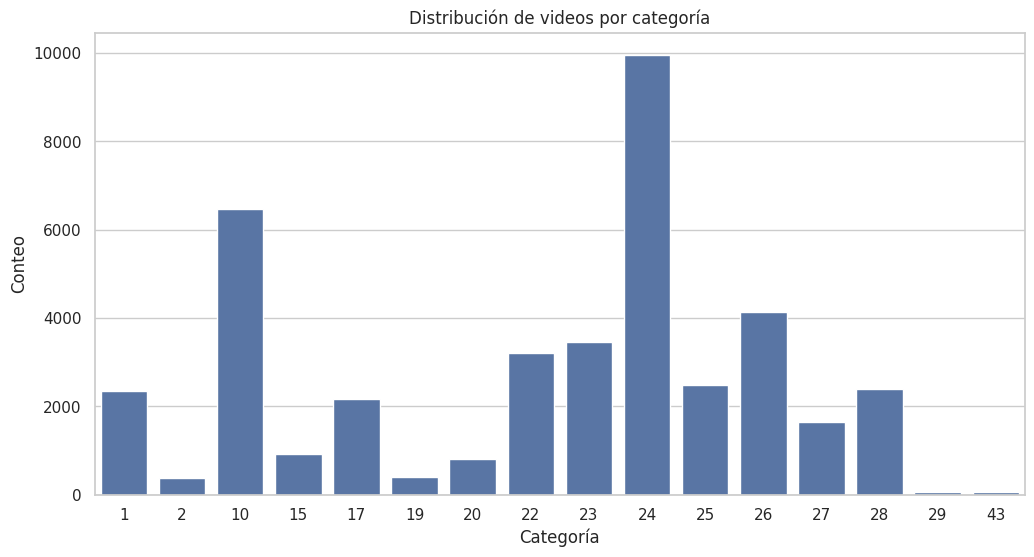

In [48]:
#Distribución de videos por categoría
sns.countplot(data=df, x='category_id')
plt.title('Distribución de videos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

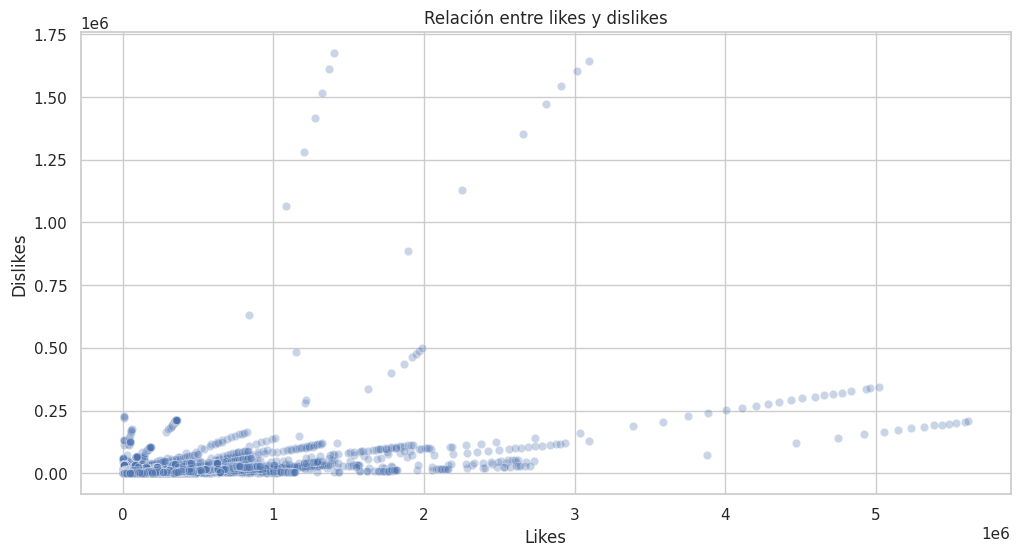

In [17]:
#Relación entre likes y dislikes
sns.scatterplot(data=df, x='likes', y='dislikes', alpha=0.3)
plt.title('Relación entre likes y dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()

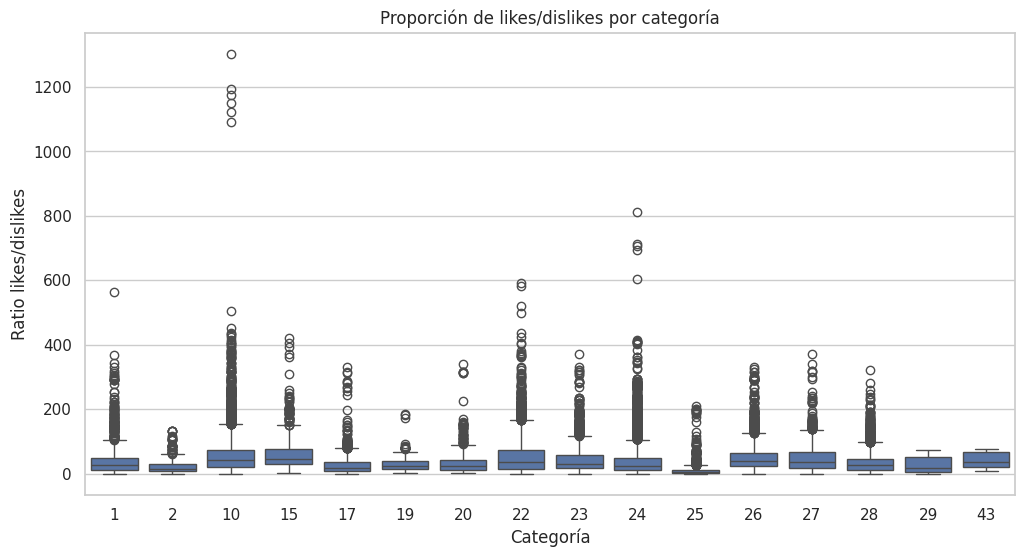

In [18]:
#Proporción de likes/dislikes por categoría
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # Evitar división por cero
sns.boxplot(data=df, x='category_id', y='like_dislike_ratio')
plt.title('Proporción de likes/dislikes por categoría')
plt.xlabel('Categoría')
plt.ylabel('Ratio likes/dislikes')
plt.show()

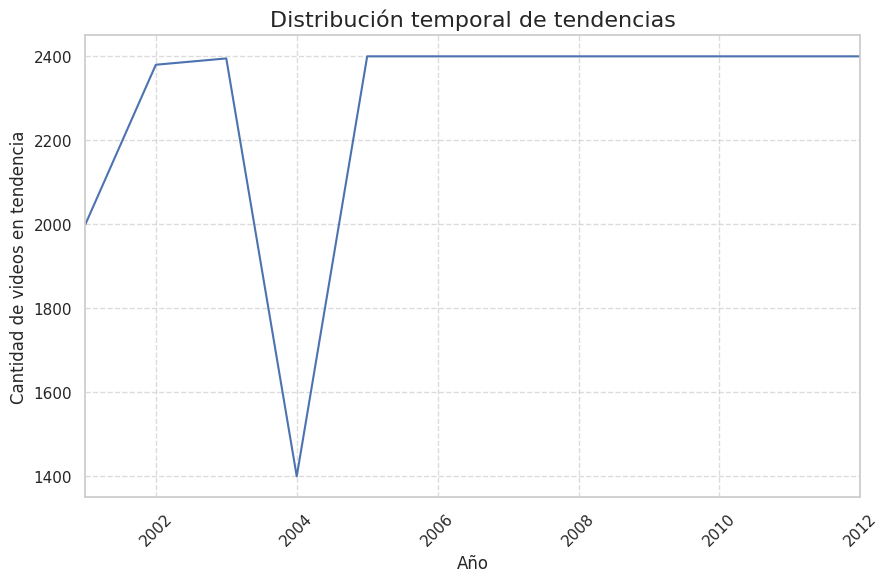

In [22]:
#Distribución temporal de tendencias
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['year'] = df['trending_date'].dt.to_period('Y')
monthly_trends = df.groupby('year').size()
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='line', linestyle='-', color='b')
plt.title('Distribución temporal de tendencias', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de videos en tendencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [23]:
# Seleccionar la variable específica
columna_especifica = 'video_id'

# Contar valores duplicados
conteo_duplicados = df[columna_especifica].value_counts()

# Filtrar solo los valores que se repiten
valores_repetidos = conteo_duplicados[conteo_duplicados > 1]

# Mostrar resultados
print("Valores repetidos y su frecuencia:")
print(valores_repetidos)

Valores repetidos y su frecuencia:
video_id
j4KvrAUjn6c    30
8h--kFui1JA    29
QBL8IRJ5yHU    29
t4pRQ0jn23Q    29
MAjY8mCTXWk    29
               ..
4AtOU0dDXv8     2
2tDKp41nrw8     2
FITSPSA8gQs     2
wENhHnJI1ys     2
LTWh-i-iJqM     2
Name: count, Length: 5644, dtype: int64


In [ ]:
#df.loc[df.video_id == 'j4KvrAUjn6c']

In [28]:
# Mostrar información antes de la limpieza
print("Información antes de la limpieza:")
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print("Valores nulos:\n", df.isnull().sum())
print("Número de duplicados:", df.duplicated().sum())

Información antes de la limpieza:
Número de filas: 40949
Número de columnas: 23
Número de duplicados: 1


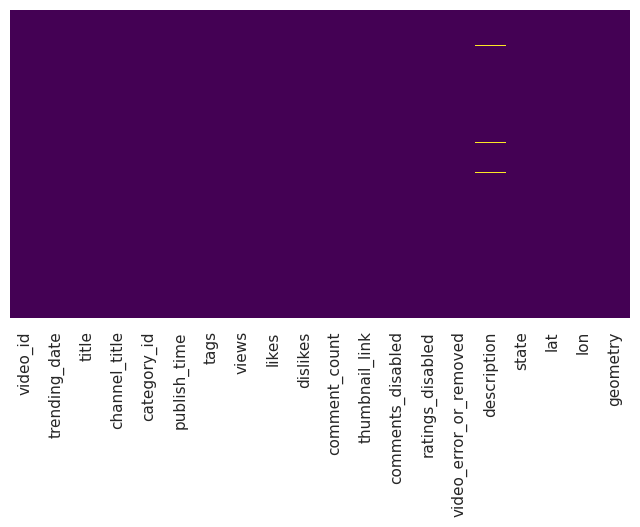

In [49]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [50]:
# Realizar la limpieza

# Eliminar duplicados
df = df.drop_duplicates()

# Reemplazar valores nulos en 'description' con Sin descripción
df.loc[:, 'description'] = df['description'].fillna("Sin descripción")

# Convertir 'category_id' a string para coincidir con el JSON y unir las categorías
df['category_id'] = df['category_id'].astype(str) #ESTO ESTABA COMENTADO -Chui
df.loc[:, 'category_id'] = df['category_id'].astype(str)
df = df.merge(categories_df, left_on='category_id', right_on='category_id', how='left')

# Conversión de columnas de fecha, si existe la columna 'publish_time'
if 'publish_time' in df.columns:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Visualización de outliers con boxplots antes de eliminarlos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

<ipython-input-50-b1d545067050>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_id'] = df['category_id'].astype(str) #ESTO ESTABA COMENTADO -Chui


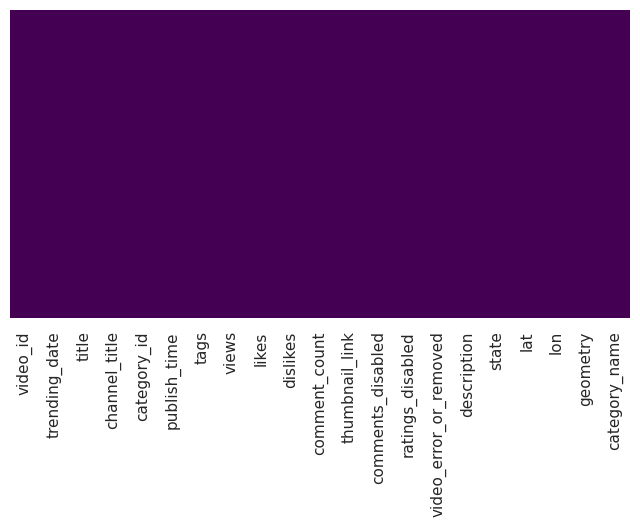

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

Visualizando outliers:


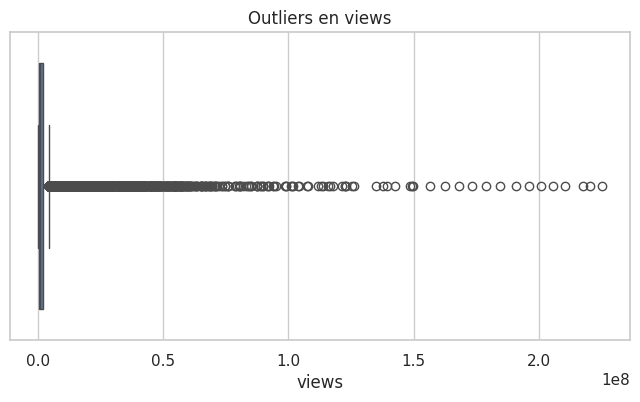

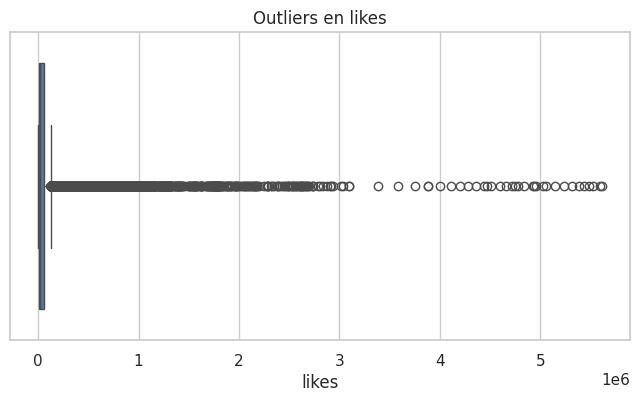

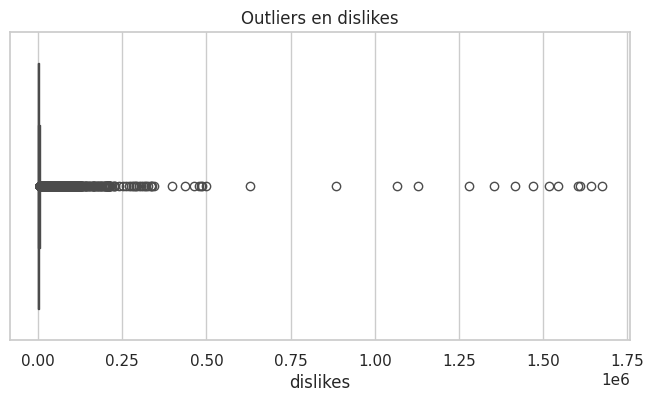

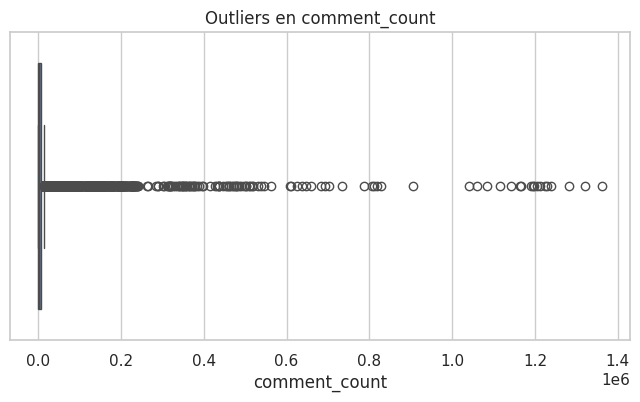

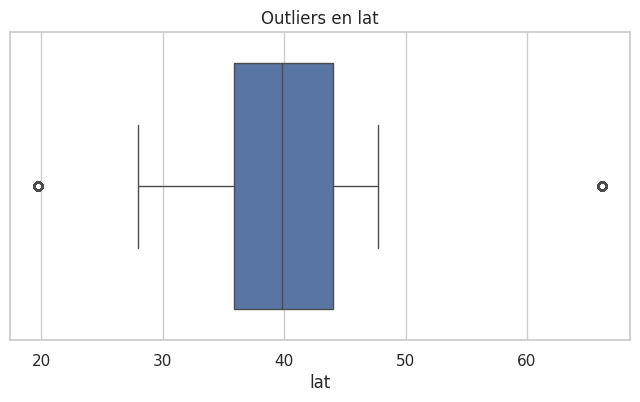

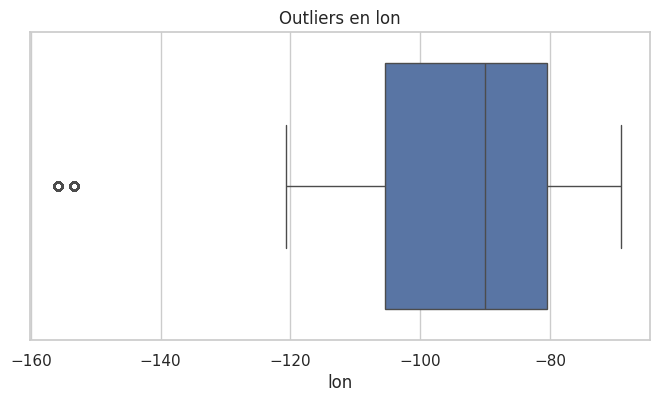

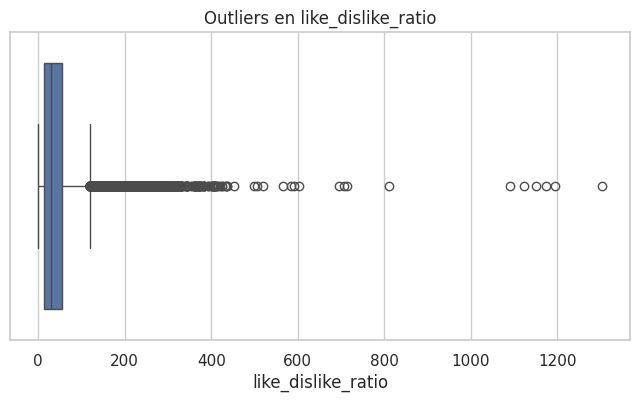

In [31]:
print("Visualizando outliers:")
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Outliers en {column}')
    plt.show()
    print("\n")

In [51]:
# Función para eliminar outliers usando el método IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers
df_cleaned = remove_outliers(df, numeric_columns)

Visualizando sin outliers:


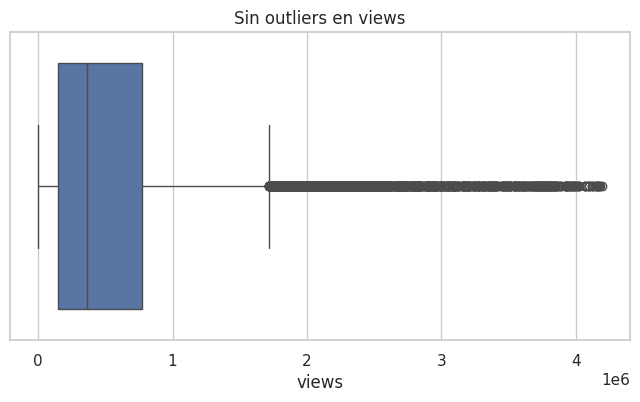

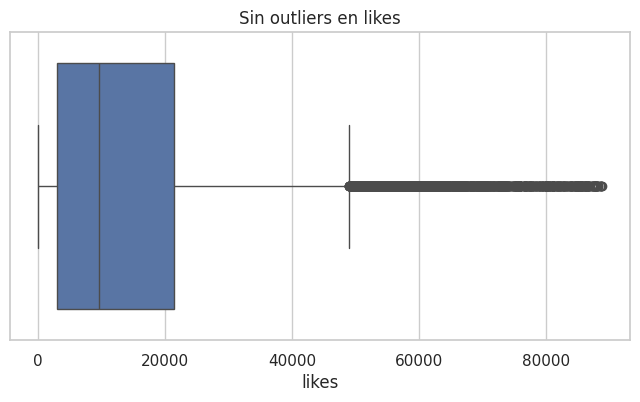

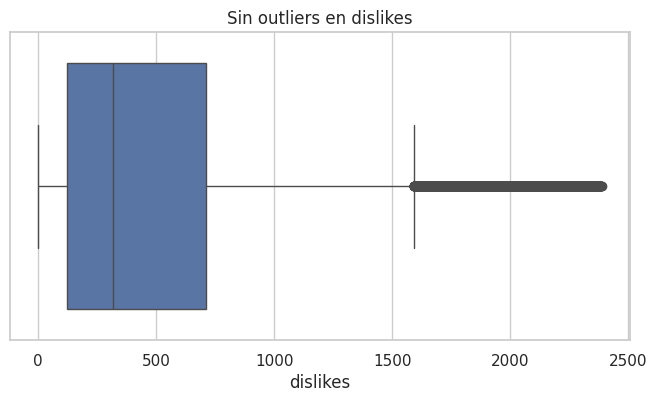

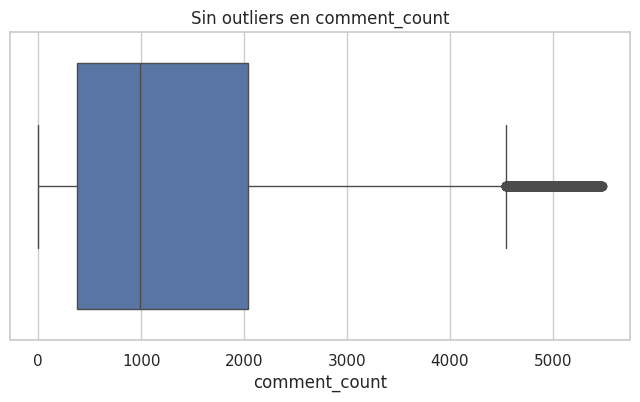

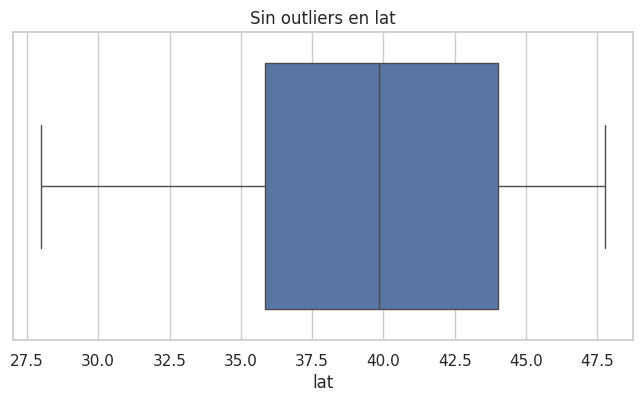

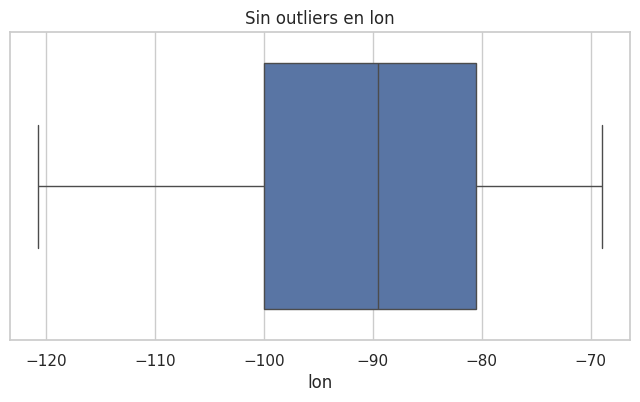

In [52]:
print("Visualizando sin outliers:")
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Sin outliers en {column}')
    plt.show()
    print("\n")

In [54]:
# Mostrar información después de eliminar outliers
print("\nInformación del dataset después de eliminar outliers:")
print("Número de filas:", df_cleaned.shape[0])
print("Número de columnas:", df_cleaned.shape[1])
print("Valores nulos:\n", df_cleaned.isnull().sum())


Información del dataset después de eliminar outliers:
Número de filas: 26670
Número de columnas: 21
Valores nulos:
 video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
category_name             0
dtype: int64


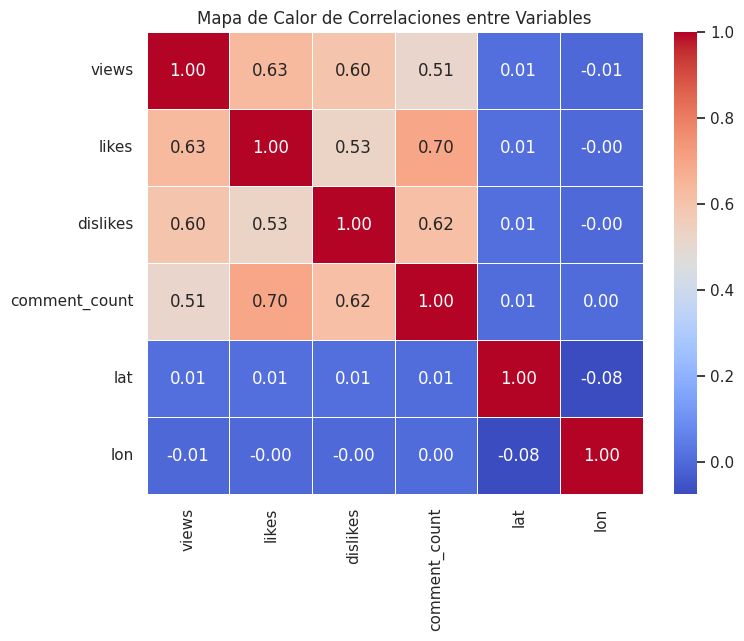

In [72]:
# Asegúrate de tener tu DataFrame 'df_cleaned' preparado
# Selecciona las columnas relevantes para la correlación
correlation_columns = ['views', 'likes', 'dislikes', 'comment_count', 'lat', 'lon']

# Calcula la matriz de correlación
correlation_matrix = df_cleaned[correlation_columns].corr()

# Configura el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crea el heatmap con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añade título y muestra el gráfico
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.show()

In [55]:
# Ratio de Likes/Dislikes
df_cleaned['like_dislike_ratio'] = df_cleaned['likes'] / (df_cleaned['dislikes'] + 1)  # Añadimos 1 para evitar división por cero

# Ratio de Vistas/Comentarios
df_cleaned['views_comments_ratio'] = df_cleaned['views'] / (df_cleaned['comment_count'] + 1)

In [75]:
df_cleaned.to_csv('Dataset_limpio.csv', index=False)

In [ ]:
#Modelo de Regresión lineal múltiple

# 2. Selección de variables predictoras y objetivo

predictor_columns = ['likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio']
# Usaremos 'likes', 'dislikes' y 'comment_count' para predecir 'views'
X = df_cleaned[predictor_columns]
y = df_cleaned['views']

#Numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. División de datos en entrenamiento y prueba
# Dividir los datos en un 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo de regresión lineal múltiple
# Crear una instancia del modelo y entrenarlo con los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluación del Modelo
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE), el error absoluto medio (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print("Resultados de la evaluación del modelo:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Resultados de la evaluación del modelo:
Error absoluto medio (MAE): 263351.11588238063
Error cuadrático medio (MSE): 205869187469.98813
Raíz del error cuadrático medio (RMSE): 453728.0986119199


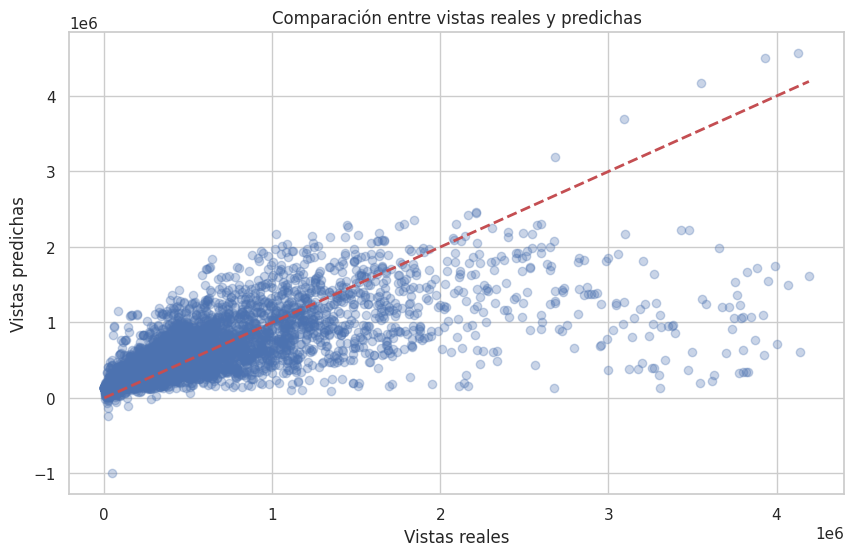

In [ ]:
# Visualización de las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Vistas reales')
plt.ylabel('Vistas predichas')

plt.title('Comparación entre vistas reales y predichas')
plt.show()

In [ ]:
# Análisis de coeficientes del modelo
coef_df = pd.DataFrame(model.coef_, predictor_columns, columns=['Coeficiente'])
print("\nCoeficientes de los predictores en el modelo de regresión:")
print(coef_df)


Coeficientes de los predictores en el modelo de regresión:
                        Coeficiente
likes                 306288.076223
dislikes              201706.041710
comment_count          -7659.757595
like_dislike_ratio    -51121.344525
views_comments_ratio   66207.216853


In [69]:
#Modelo de Árbol de decisión

# 2. Selección de Variables Predictoras y Variable Objetivo
# Usamos las mismas variables predictoras que antes
predictor_columns = ['likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio']
X = df_cleaned[predictor_columns]
y = df_cleaned['views']

# Escalado de las Variables Predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Creación y Entrenamiento del Modelo de Árbol de Decisión
# Puedes ajustar el parámetro 'max_depth' para controlar la profundidad del árbol y evitar el sobreajuste
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)

# 5. Evaluación del Modelo
# Predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular métricas de error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [70]:
print("Resultados de la evaluación del Árbol de Decisión de Regresión:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Resultados de la evaluación del Árbol de Decisión de Regresión:
Error absoluto medio (MAE): 48952.811222144985
Error cuadrático medio (MSE): 11348519615.663725
Raíz del error cuadrático medio (RMSE): 106529.43074880165


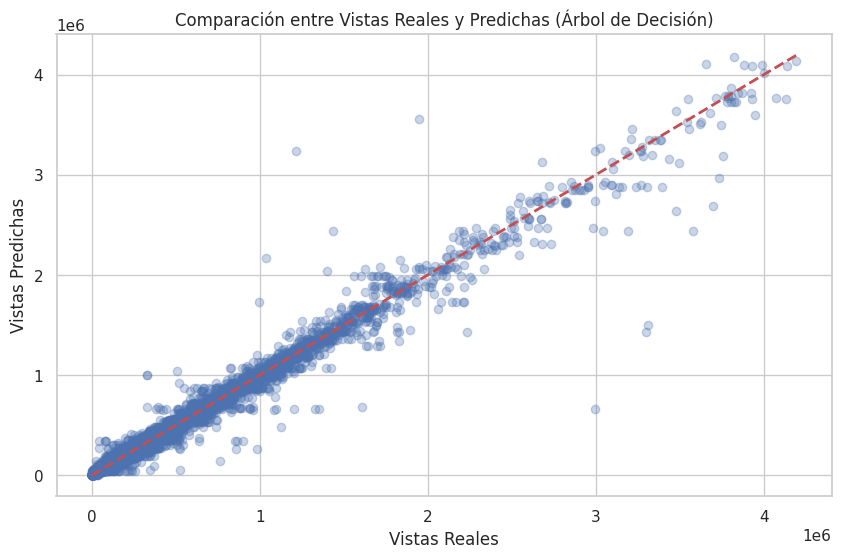

In [71]:
# Visualización de las Predicciones frente a los Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Vistas Reales')
plt.ylabel('Vistas Predichas')
plt.title('Comparación entre Vistas Reales y Predichas (Árbol de Decisión)')
plt.show()



<ipython-input-32-8b2ea16e4dba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances['Importancia'], palette="viridis")


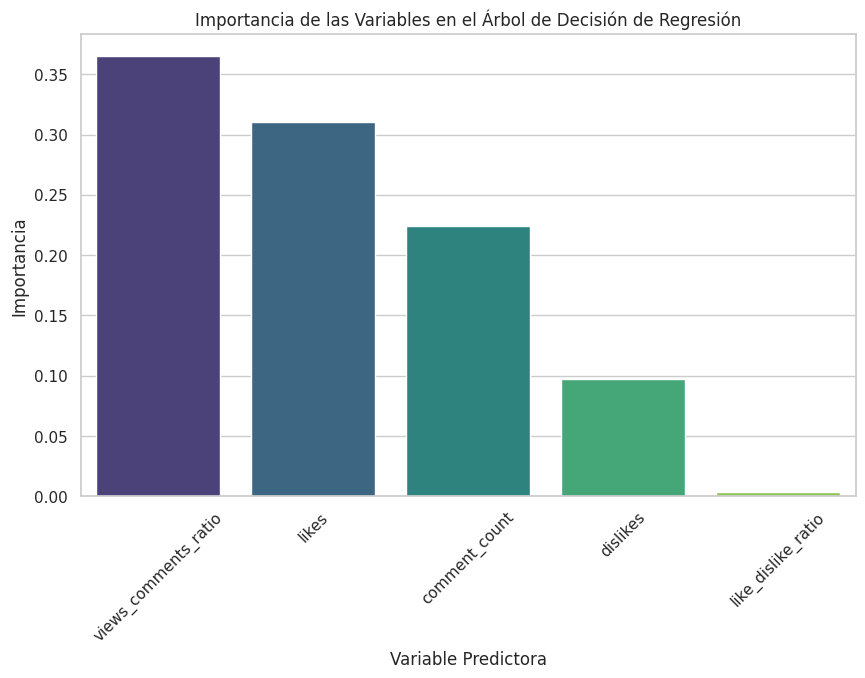

In [ ]:
# Visualización de la Importancia de las Variables
feature_importances = pd.DataFrame(tree_model.feature_importances_, index=predictor_columns, columns=['Importancia'])
feature_importances.sort_values(by='Importancia', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importancia'], palette="viridis")
plt.title("Importancia de las Variables en el Árbol de Decisión de Regresión")
plt.xlabel("Variable Predictora")
plt.ylabel("Importancia")
plt.xticks(rotation=45)
plt.show()

# Respuesta a las preguntas

<ipython-input-56-45ac2ebaa99a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trend_counts.values, y=trend_counts.index, palette="viridis")


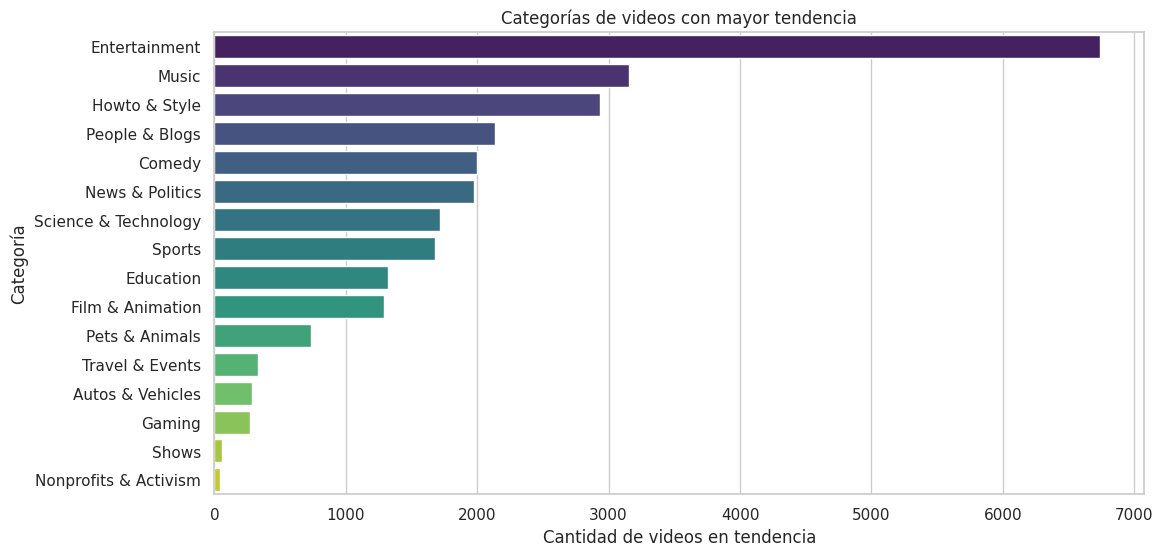

In [56]:
# Configuración para visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Pregunta 1:
plt.figure(figsize=(12, 6))
trend_counts = df_cleaned['category_name'].value_counts()
sns.barplot(x=trend_counts.values, y=trend_counts.index, palette="viridis")
plt.title("Categorías de videos con mayor tendencia")
plt.xlabel("Cantidad de videos en tendencia")
plt.ylabel("Categoría")
plt.show()

<ipython-input-57-dbcdf2c9905d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_by_category, y=likes_by_category.index, palette="coolwarm")


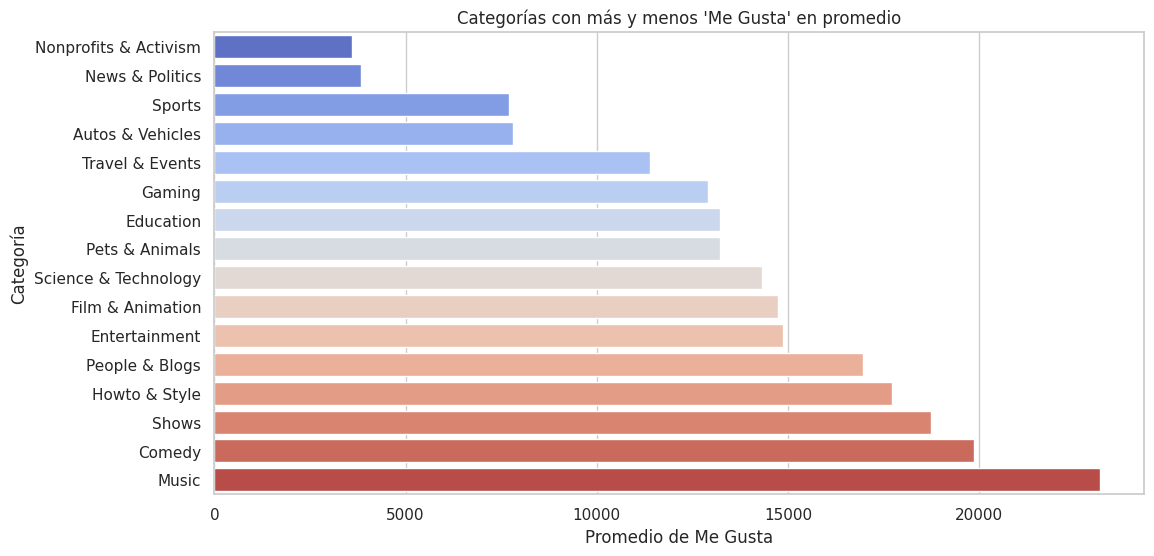

In [57]:
# Pregunta 2:
plt.figure(figsize=(12, 6))
likes_by_category = df_cleaned.groupby('category_name')['likes'].mean().sort_values()
sns.barplot(x=likes_by_category, y=likes_by_category.index, palette="coolwarm")
plt.title("Categorías con más y menos 'Me Gusta' en promedio")
plt.xlabel("Promedio de Me Gusta")
plt.ylabel("Categoría")
plt.show()

<ipython-input-58-fb853efb31b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_by_category, y=ratio_by_category.index, palette="Spectral")


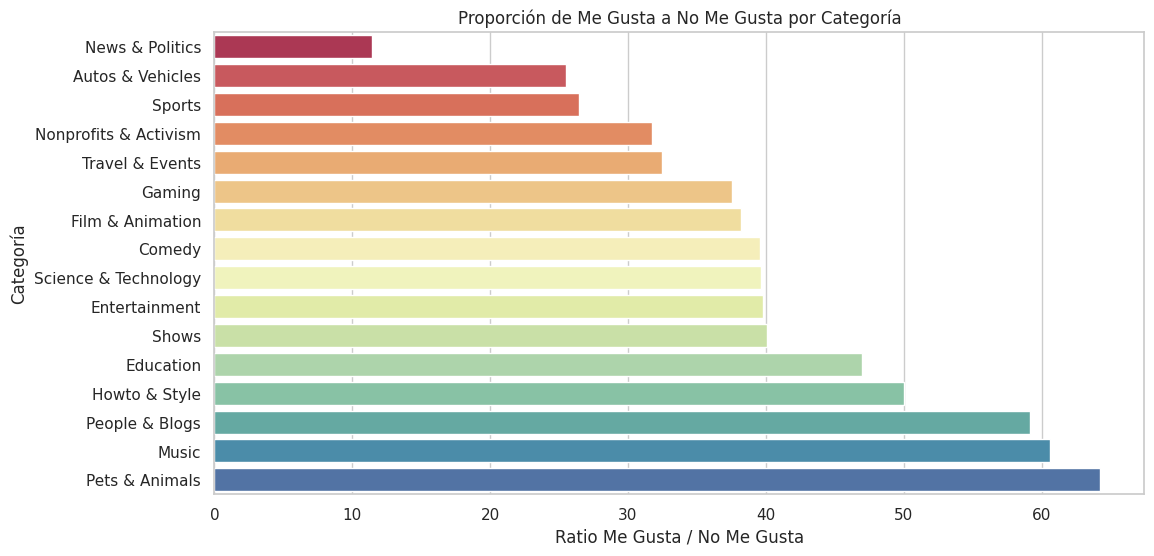

In [58]:
# Pregunta 3: ¿Qué categorías de videos tienen la mejor proporción (ratio) de 'Me gusta' / 'No me gusta'?
df_cleaned['like_dislike_ratio'] = df_cleaned['likes'] / (df_cleaned['dislikes'] + 1)
ratio_by_category = df_cleaned.groupby('category_name')['like_dislike_ratio'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=ratio_by_category, y=ratio_by_category.index, palette="Spectral")
plt.title("Proporción de Me Gusta a No Me Gusta por Categoría")
plt.xlabel("Ratio Me Gusta / No Me Gusta")
plt.ylabel("Categoría")
plt.show()

<ipython-input-59-913549fb9f36>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=views_comments_ratio_by_category, y=views_comments_ratio_by_category.index, palette="magma")


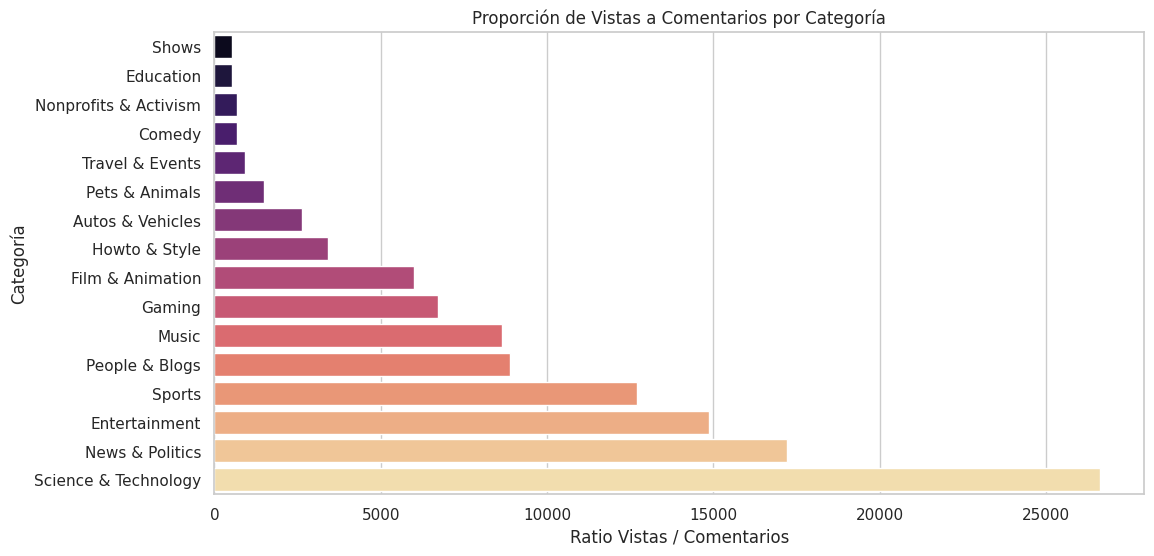

In [59]:
# Pregunta 4:
df_cleaned['views_comments_ratio'] = df_cleaned['views'] / (df_cleaned['comment_count'] + 1)
views_comments_ratio_by_category = df_cleaned.groupby('category_name')['views_comments_ratio'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=views_comments_ratio_by_category, y=views_comments_ratio_by_category.index, palette="magma")
plt.title("Proporción de Vistas a Comentarios por Categoría")
plt.xlabel("Ratio Vistas / Comentarios")
plt.ylabel("Categoría")
plt.show()

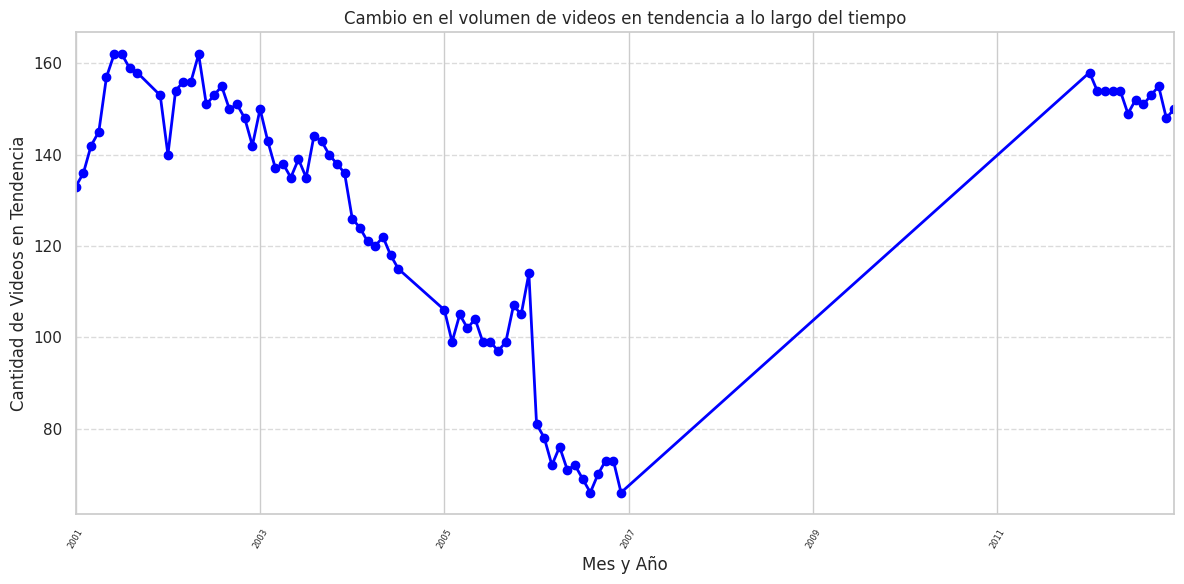

In [64]:
# Pregunta 5: ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?
df_cleaned['trending_date'] = pd.to_datetime(df_cleaned['trending_date'], errors='coerce')
df_cleaned['month_year'] = df_cleaned['trending_date'].dt.to_period('M')
trending_volume = df_cleaned['month_year'].value_counts().sort_index()

# Creamos el gráfico de línea
plt.figure(figsize=(12, 6))
trending_volume.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title("Cambio en el volumen de videos en tendencia a lo largo del tiempo")
plt.xlabel("Mes y Año")
plt.ylabel("Cantidad de Videos en Tendencia")
plt.xticks(rotation=60, fontsize=6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-61-808cc8970ee3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_trend_counts, y=channel_trend_counts.index, palette="cubehelix")


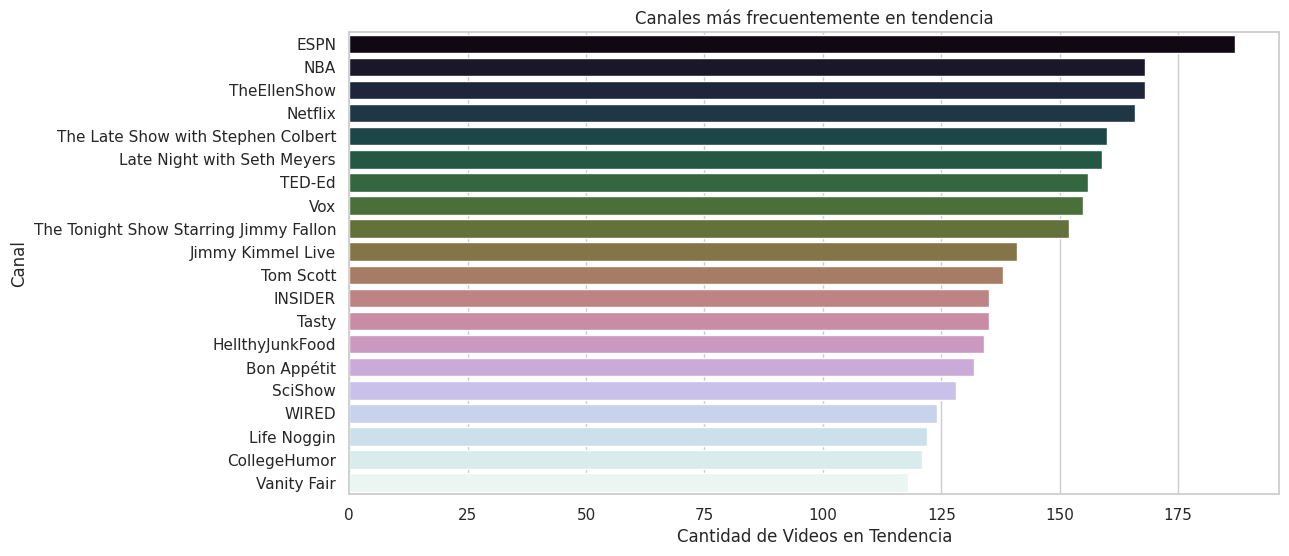

In [61]:
# Pregunta 6: ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?
channel_trend_counts = df_cleaned['channel_title'].value_counts().head(20)  # Top 20 canales
plt.figure(figsize=(12, 6))
sns.barplot(x=channel_trend_counts, y=channel_trend_counts.index, palette="cubehelix")
plt.title("Canales más frecuentemente en tendencia")
plt.xlabel("Cantidad de Videos en Tendencia")
plt.ylabel("Canal")
plt.show()

Resumen por Estado (Total de Vistas, Me Gusta y No Me Gusta):
                  total_views  total_likes  total_dislikes
state                                                     
New Hampshire       362690653      9517710          309920
Minnesota           359657566      9519304          322262
Washington State    342039271      8711173          286445
Michigan            338765040      8771239          287297
North Dakota        338319782      9037931          287870
Kentucky            337789309      8277201          281822
Georgia             334829563      9030778          287304
North Carolina      333675411      8499370          293796
Mississippi         331572982      9038436          288517
Rhode Island        330054748      8233013          267144


<Figure size 1400x800 with 0 Axes>

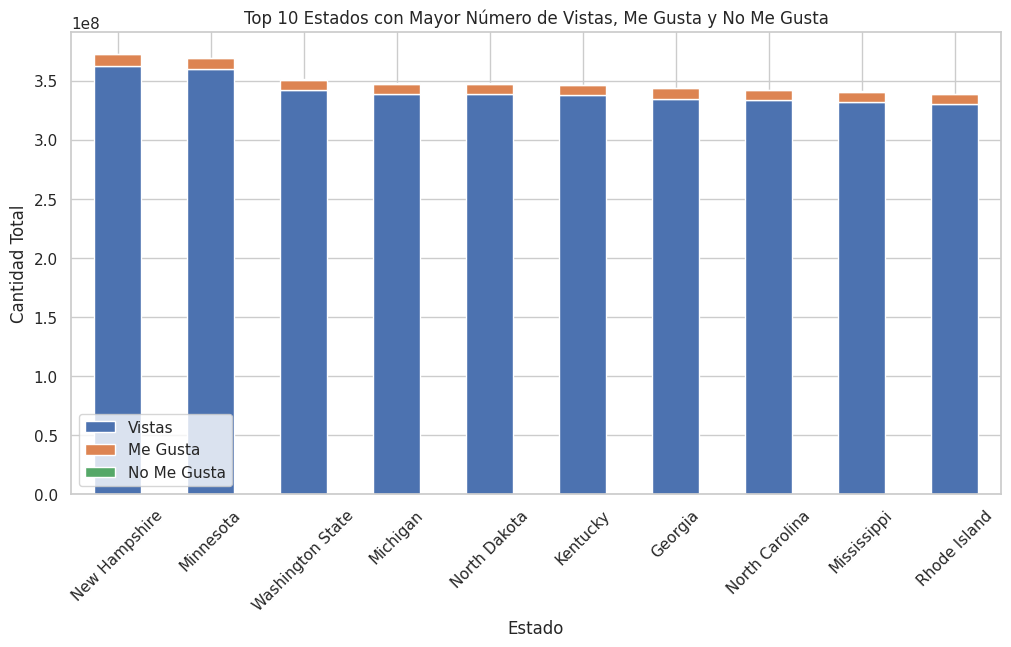

In [65]:
# Pregunta 7:
# Agrupar por estado y calcular la suma de vistas, me gusta y no me gusta
state_summary = df_cleaned.groupby('state').agg(
     total_views=('views', 'sum'),
    total_likes=('likes', 'sum'),
    total_dislikes=('dislikes', 'sum')
).sort_values(by='total_views', ascending=False)

# Mostrar los resultados del análisis de estados
print("Resumen por Estado (Total de Vistas, Me Gusta y No Me Gusta):")
print(state_summary.head(10))  # Mostrar los 10 estados principales para cada métrica

# Visualización de los estados con el mayor número de "Vistas", "Me gusta" y "No me gusta"
plt.figure(figsize=(14, 8))
state_summary[['total_views', 'total_likes', 'total_dislikes']].head(10).plot(kind='bar', stacked=True)
plt.title("Top 10 Estados con Mayor Número de Vistas, Me Gusta y No Me Gusta")
plt.xlabel("Estado")
plt.ylabel("Cantidad Total")
plt.xticks(rotation=45)
plt.legend(["Vistas", "Me Gusta", "No Me Gusta"])
plt.show()

Promedio de comentarios para videos en tendencia (top 10% de vistas): 2602.0862392200975
Promedio de comentarios para videos no en tendencia: 1255.7378661000707


<ipython-input-62-74f4bec71c2d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Trending', 'Not Trending'], y=[comments_trending, comments_non_trending], palette="Set2")


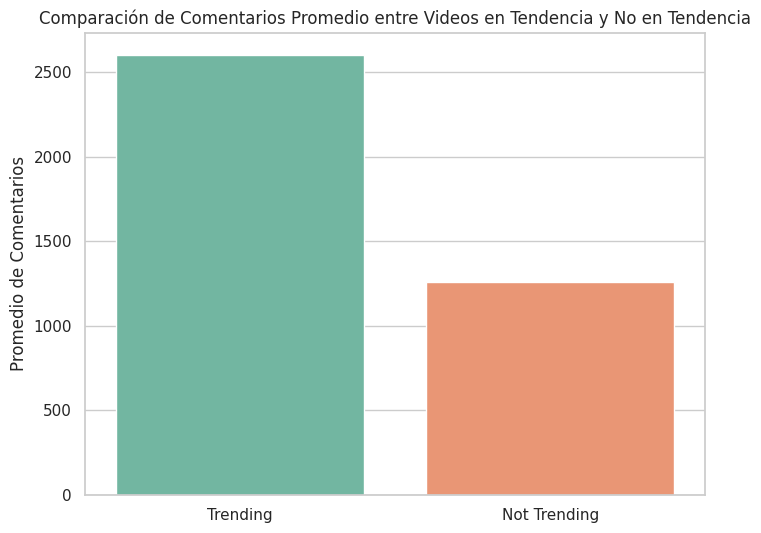

In [62]:
# Pregunta 8:
# Definir el umbral para considerar un video en "tendencia" (top 10% en vistas)
top_trending_threshold = df_cleaned['views'].quantile(0.9)

# Crear una nueva columna para identificar si un video es "en tendencia" o no
df_cleaned['is_trending'] = df_cleaned['views'] >= top_trending_threshold

# Calcular el promedio de comentarios para videos en tendencia y no en tendencia
comments_trending = df_cleaned[df_cleaned['is_trending']]['comment_count'].mean()
comments_non_trending = df_cleaned[~df_cleaned['is_trending']]['comment_count'].mean()

# Mostrar los resultados
print("Promedio de comentarios para videos en tendencia (top 10% de vistas):", comments_trending)
print("Promedio de comentarios para videos no en tendencia:", comments_non_trending)

# Visualización de los resultados
plt.figure(figsize=(8, 6))
sns.barplot(x=['Trending', 'Not Trending'], y=[comments_trending, comments_non_trending], palette="Set2")
plt.title("Comparación de Comentarios Promedio entre Videos en Tendencia y No en Tendencia")
plt.ylabel("Promedio de Comentarios")
plt.show()



In [63]:
#Pregunta 9:

#Ejecutar el código final antes
#Modelo de Árbol de decisión

# 2. Selección de Variables Predictoras y Variable Objetivo
# Usamos las mismas variables predictoras que antes
predictor_columns = ['likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'views_comments_ratio']
X = df_cleaned[predictor_columns]
y = df_cleaned['views']

# Escalado de las Variables Predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. División de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Creación y Entrenamiento del Modelo de Árbol de Decisión
# Puedes ajustar el parámetro 'max_depth' para controlar la profundidad del árbol y evitar el sobreajuste
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)

# 5. Evaluación del Modelo
# Predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular métricas de error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



In [ ]:
print("Resultados de la evaluación del Árbol de Decisión de Regresión:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Resultados de la evaluación del Árbol de Decisión de Regresión:
Error absoluto medio (MAE): 48952.811222144985
Error cuadrático medio (MSE): 11348519615.663725
Raíz del error cuadrático medio (RMSE): 106529.43074880165


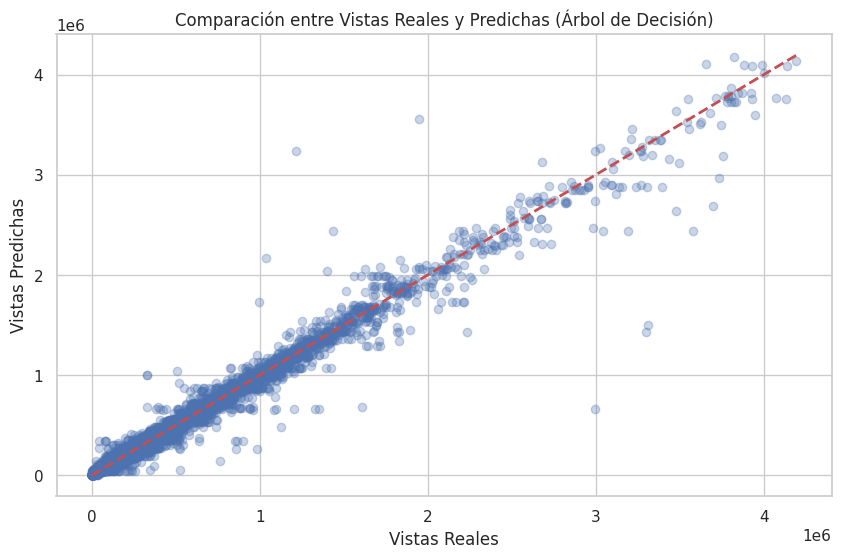

In [ ]:
# Visualización de las Predicciones frente a los Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Vistas Reales')
plt.ylabel('Vistas Predichas')
plt.title('Comparación entre Vistas Reales y Predichas (Árbol de Decisión)')
plt.show()

<ipython-input-44-ac8aa41b787f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances['Importancia'], palette="viridis")


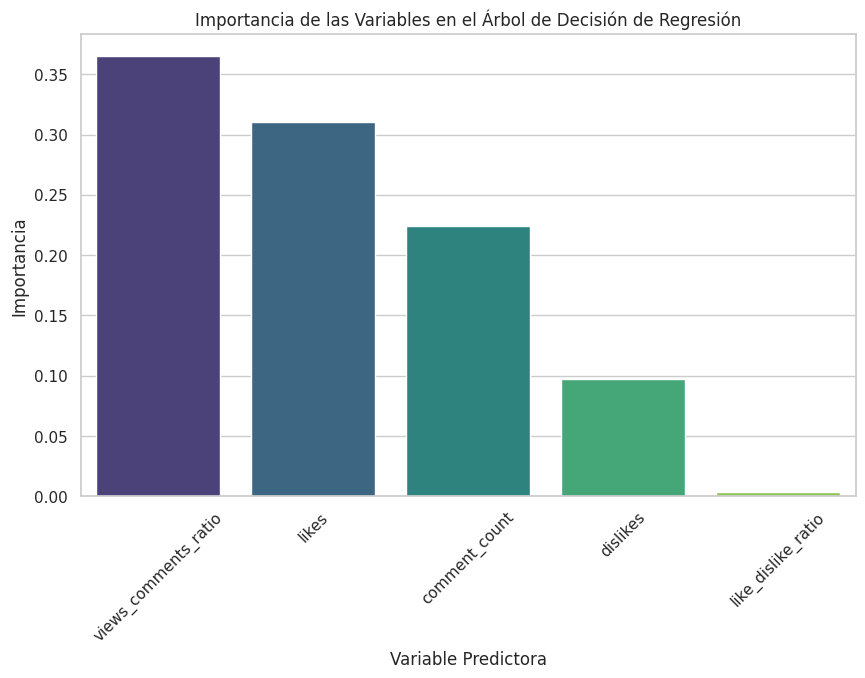

In [ ]:
# Visualización de la Importancia de las Variables
feature_importances = pd.DataFrame(tree_model.feature_importances_, index=predictor_columns, columns=['Importancia'])
feature_importances.sort_values(by='Importancia', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importancia'], palette="viridis")
plt.title("Importancia de las Variables en el Árbol de Decisión de Regresión")
plt.xlabel("Variable Predictora")
plt.ylabel("Importancia")
plt.xticks(rotation=45)
plt.show()

# Sí, es factible predecir el número de vistas, ya que los resultados obtenidos en el modelo de árbol de decisión muestran una
# alta precisión en las predicciones, con un bajo error absoluto medio (MAE) y raíz del error cuadrático medio (RMSE). Esto
# indica que el modelo es capaz de capturar las relaciones entre las variables, como la proporción de vistas a comentarios, los
# "likes" y el número de comentarios, y utilizarlas para predecir el número de vistas de manera efectiva. Además, las métricas
# de error sugieren que el modelo tiene un buen desempeño en la mayoría de los casos y puede adaptarse para predecir otras
# métricas de interacción, como "likes" y "dislikes", si se seleccionan las variables predictoras adecuadas. En conclusión, el
# modelo de árbol de decisión demuestra ser una herramienta útil y precisa para anticipar la cantidad de vistas en función de las
# características de interacción del contenido, lo que resulta prometedor para el análisis de popularidad en plataformas de video.